# The Quantum Fourier Transform
In this file we will implement the QFT in the case of an $3$ qubit system.

In [1]:
from qiskit import *
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_histogram,plot_state_qsphere, plot_bloch_multivector, plot_state_city

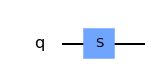

In [2]:
#initialising the controlled-S gate
qc_s = QuantumCircuit(1)
qc_s.s(0)
qc_s.name = '$S$'
custom_controlled_s = qc_s.to_gate().control(1)
qc_s.draw('mpl')

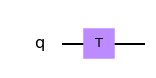

In [3]:
#initalising the controlled-T gate
qc_t = QuantumCircuit(1)
qc_t.t(0)
qc_t.name = '$T$'
custom_controlled_t = qc_t.to_gate().control(1)
qc_t.draw('mpl')

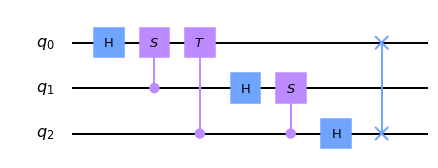

In [4]:
#making the circuit for the three qubit QFT
qft = QuantumCircuit(3)
qft.h(0)
qft.append(custom_controlled_s,[1,0])
qft.append(custom_controlled_t,[2,0])
qft.h(1)
qft.append(custom_controlled_s,[2,1])
qft.h(2)
qft.swap(0,2)
qft.name = '  QFT'
qft.draw('mpl')

We have, the default state,
$$|\psi_0\rangle = |000\rangle$$
Let's convert this to some other state to perform a non-trivial QFT on:
$$|\psi_1\rangle = \frac{|100\rangle + |101\rangle}{\sqrt{2}}$$
Now we code this:

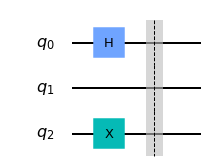

In [5]:
#initialising our main circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.x(2)
qc.barrier()
qc.draw('mpl')

Now, using the various visualization tools provided by qiskit, we give a graphical representation of the initial state

In [6]:
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(qc, backend).result()
psi  = result.get_statevector(qc)

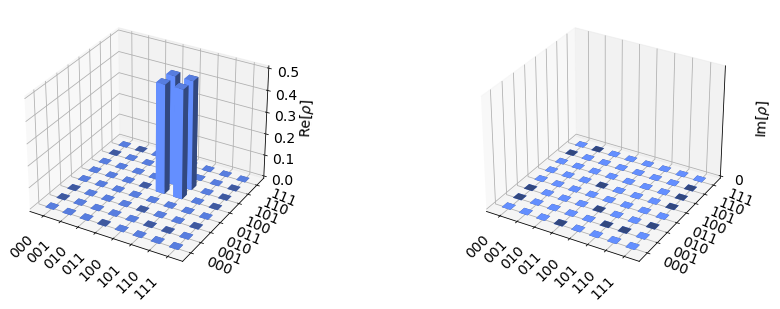

In [7]:
plot_state_city(psi)

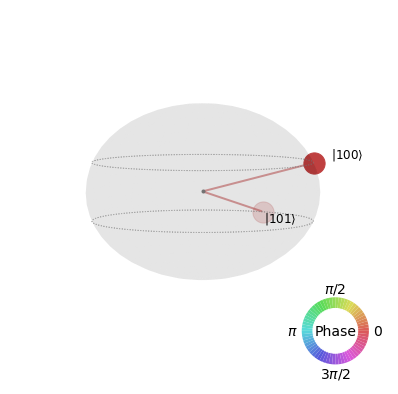

In [8]:
plot_state_qsphere(psi)

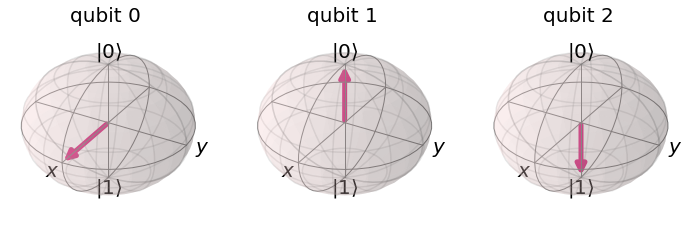

In [9]:
plot_bloch_multivector(psi)

Now we add the QFT circuit to our main circuit, and visualise the state we get.

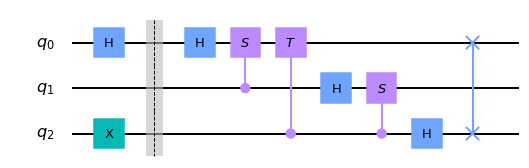

In [10]:
qc += qft
qc.draw('mpl')

In [11]:
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(qc, backend).result()
psi  = result.get_statevector(qc)

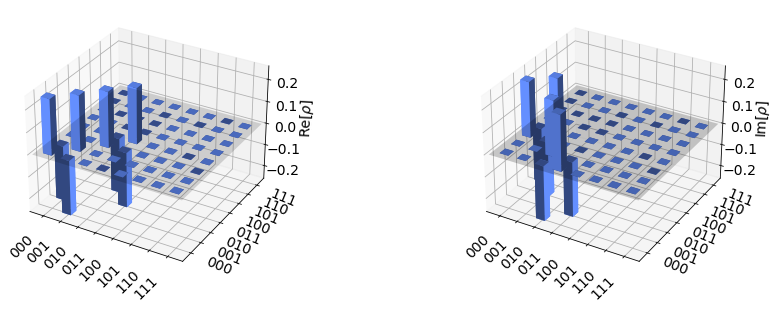

In [12]:
plot_state_city(psi)

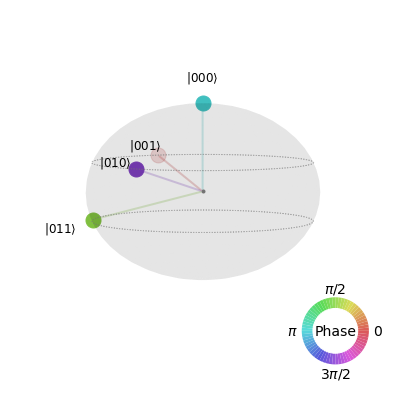

In [13]:
plot_state_qsphere(psi)

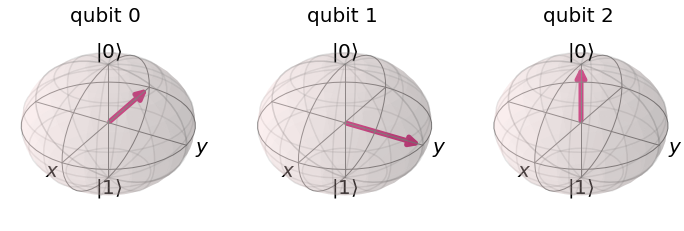

In [14]:
plot_bloch_multivector(psi)

This, is the quantum fourier transformed version of our inital qubit state.